In [13]:
import pandas as pd

In [2]:
df=pd.read_csv("zoo_data(For Decision Tree Program).csv")

In [3]:
df.head()

,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6,1.7
0,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


# Splitting into X and Y

In [14]:
x=df.values[:,0:16]
X=df.drop('1.7',axis=1)
y=df.values[:,-1]
Y=df['1.7']
Y

0     1
1     4
2     1
3     1
4     1
     ..
95    1
96    6
97    1
98    7
99    2
Name: 1.7, Length: 100, dtype: int64

# Splitting into test and train

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# Decision tree classifier

In [6]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')
dt

DecisionTreeClassifier(criterion='entropy')

# Fitting training data

In [7]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

# Predict the target feature

In [8]:
y_pred = dt.predict(X_test)
y_pred

array([4, 1, 1, 1, 1, 6, 4, 4, 1, 3, 1, 5, 1, 2, 3, 1, 2, 5, 7, 7, 5, 4,
       1, 3, 1, 7, 2, 1, 6, 4], dtype=int64)

# FInding the performance

# Accuracy

In [9]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


# Confusion matrix

In [10]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[9 0 0 0 1 0 0]
 [0 3 0 0 0 0 0]
 [1 0 3 0 0 0 0]
 [0 0 0 5 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 2 0]
 [1 0 0 0 0 0 3]]


# Calculating recall

In [11]:
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       1.00      1.00      1.00         3
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         5
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2
           7       1.00      0.75      0.86         4

    accuracy                           0.90        30
   macro avg       0.93      0.91      0.91        30
weighted avg       0.92      0.90      0.90        30



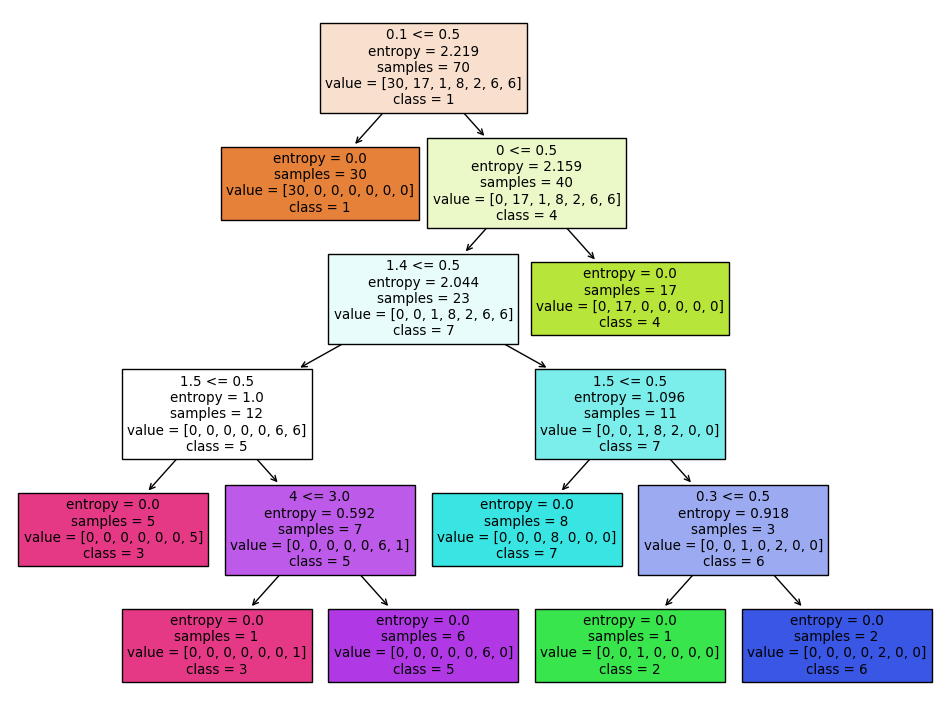

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming you have 'dt', 'df', and 'class_names' defined
class_names = [str(class_name) for class_name in df[df.columns[-1]].unique()]

# Convert DataFrame columns to a list
feature_names = list(df.columns[:-1])

# Visualize the Decision Tree
plt.figure(figsize=(12, 9))
plot_tree(dt, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()
